In [1]:
from py2neo import Graph
import pandas as pd
import os

import matplotlib.pyplot as plt

# host + port
host = 'http://localhost:11008'

# select database name
db_name = 'modelparallel'

# credentials for API
user = 'neo4j'
passwd = '1234'

model_graph = Graph(host, auth=(user, passwd), name=db_name)

              pr  c_ein  c_aus  c_ges  peak_intensity  peak_relint_tic  \
0            NaN      0      0      0    1.927048e+06         0.000011   
1            NaN      0      0      0    1.927783e+06         0.000011   
2            NaN      0      0      0    1.936694e+06         0.000012   
3            NaN      0      0      0    1.946057e+06         0.000012   
4       0.176330      5      0      5    1.958668e+06         0.000012   
...          ...    ...    ...    ...             ...              ...   
110674  0.514416     33     47     80    6.525129e+08         0.006113   
110675  0.514416     33     47     80    5.991665e+08         0.005378   
110676  0.514416     33     47     80    9.374010e+08         0.006312   
110677  0.514416     33     47     80    1.616222e+09         0.010232   
110678  0.514416     33     47     80    9.275692e+08         0.005498   

        formula_mass   C   H  O  N  S  peak_mass_deconvoluted  \
0         198.962252   4   1  1  5  2         

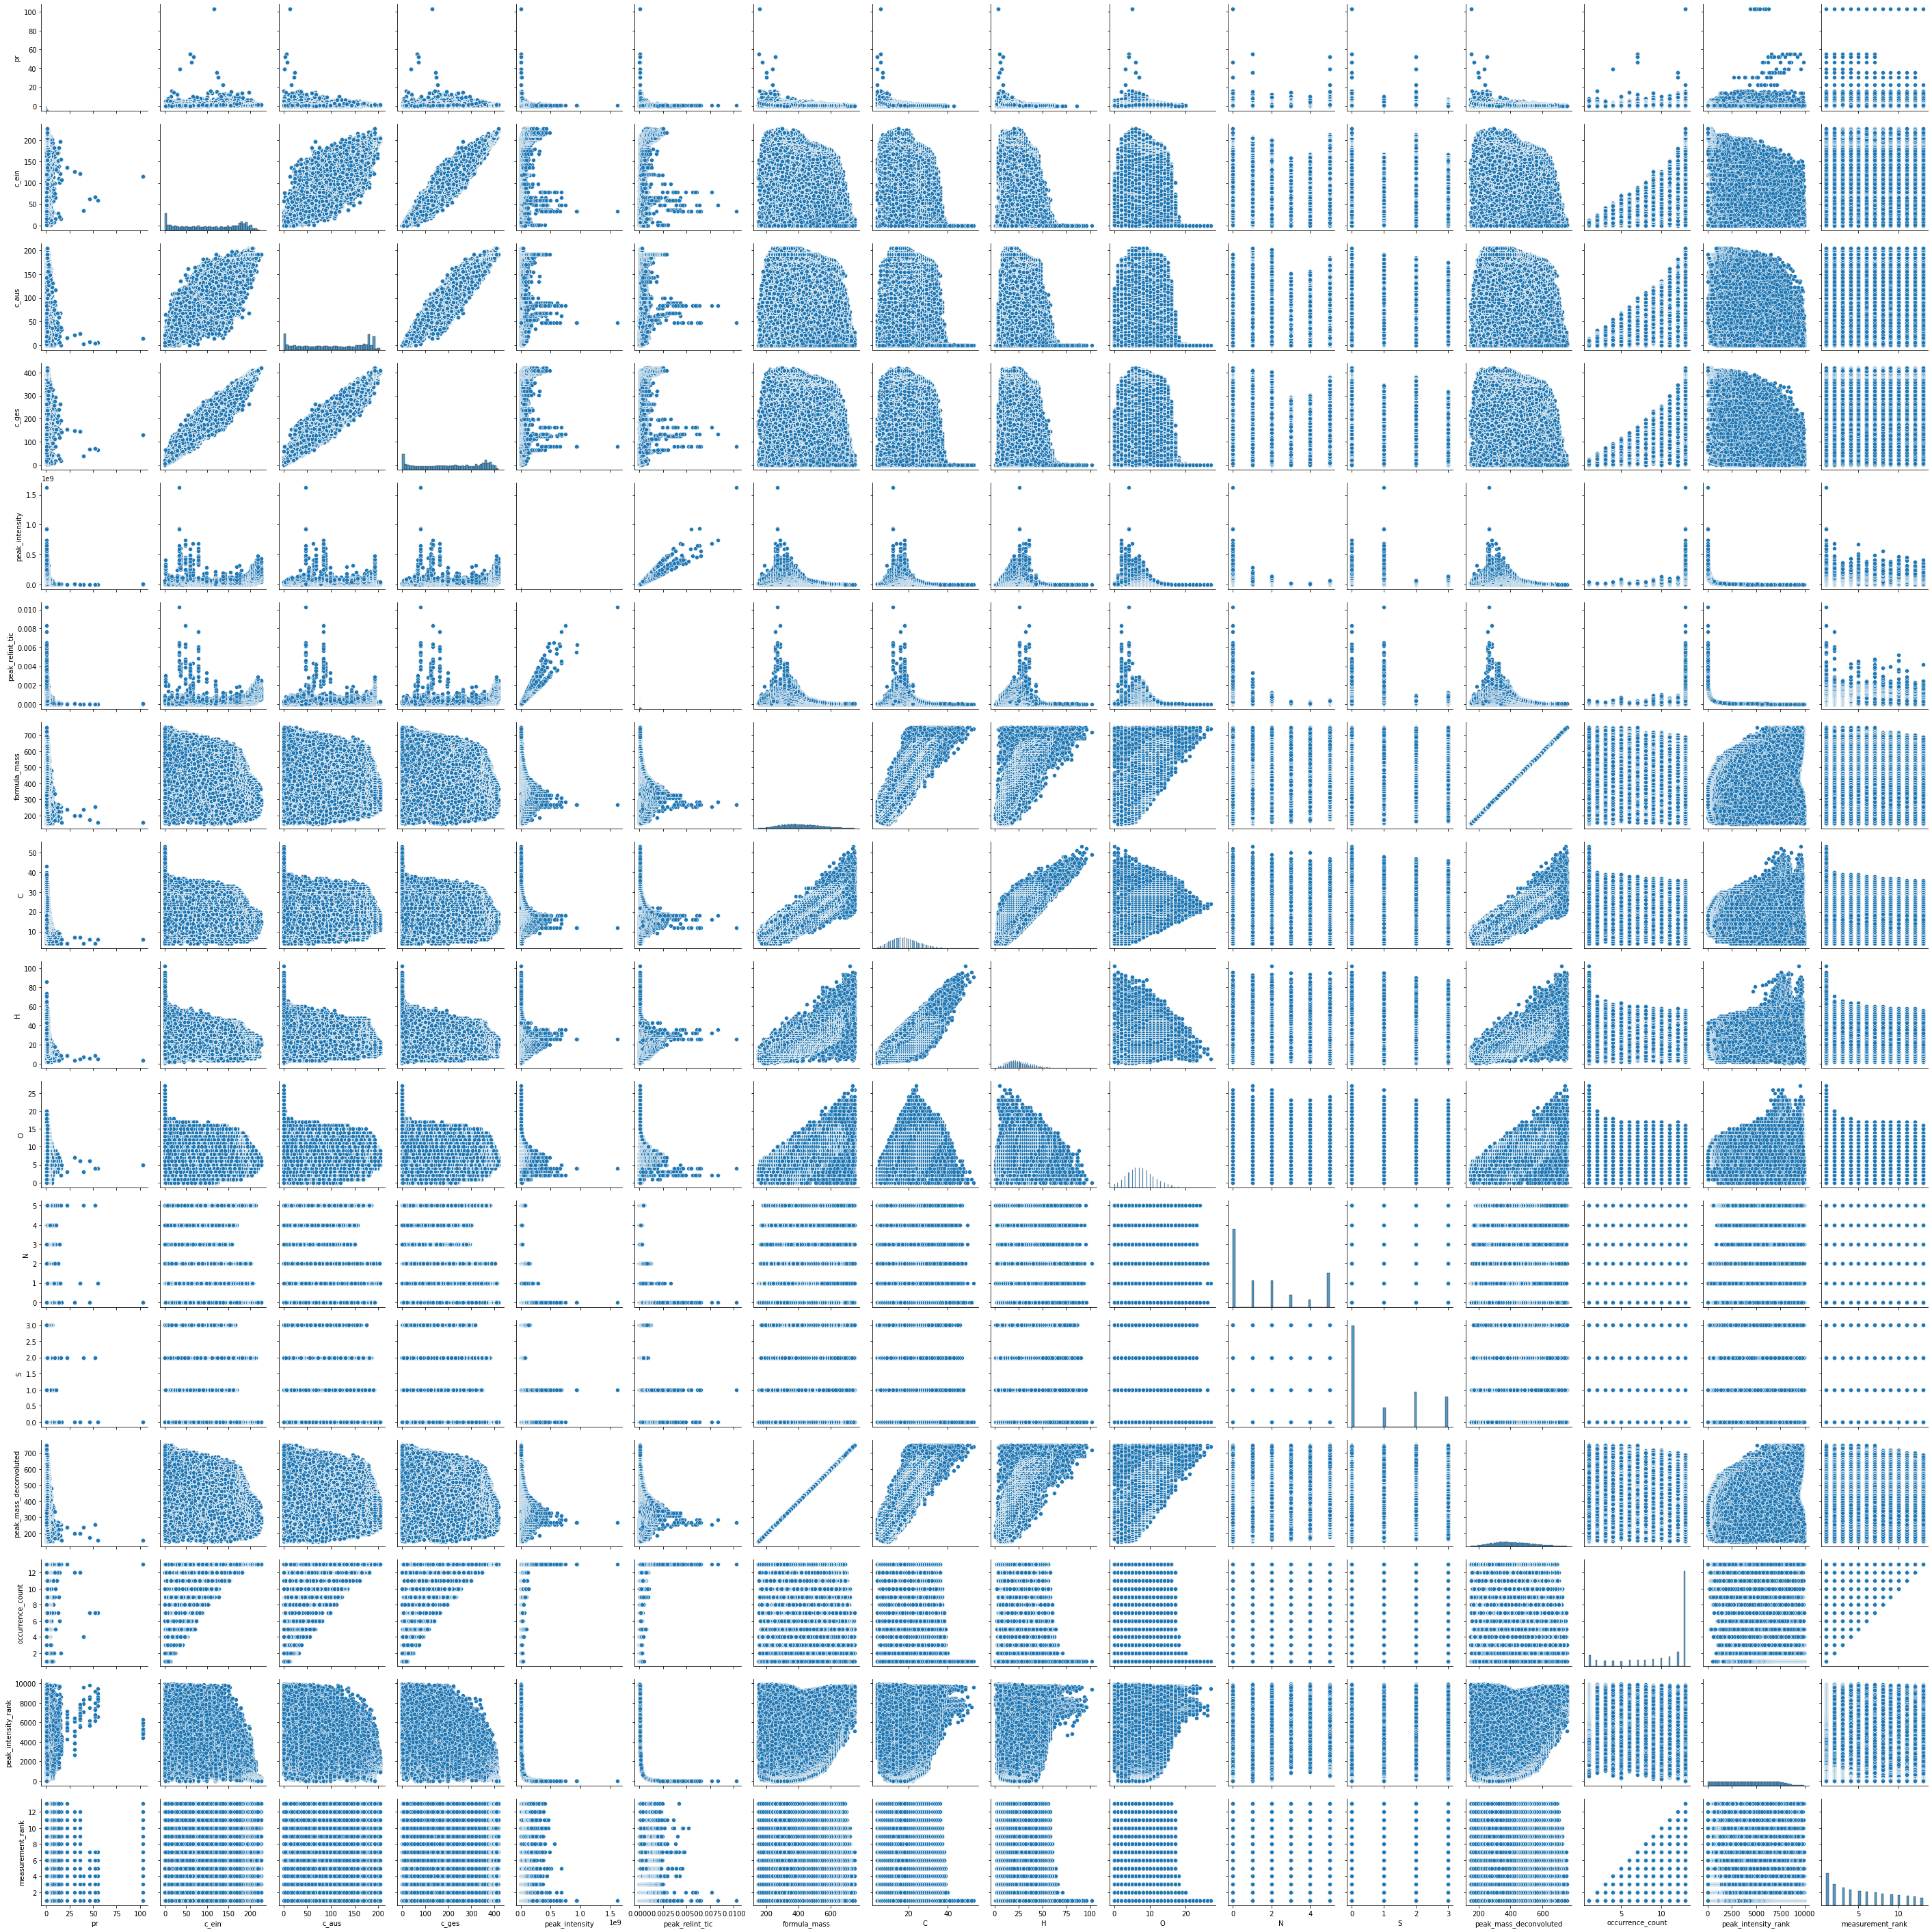

In [45]:
import matplotlib.pyplot as plt
#from mlxtend.data import iris_data
#from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

df = pd.read_csv("/home/philipp/github/neoscripts/models/files_for_model/ufz_all_formulas_cleaned.csv")
#df = df[['peak_mz','peak_mz_nominal','peak_charge', 'peak_intensity', 'peak_relint_bp', 'peak_mass_deconvoluted', 'peak_relint_tic', 'peak_sn', 'peak_resolution', 'formula_mass', 'C', 'H', 'O', 'N', 'S', 'occurrence_count', 'peak_intensity_rank', 'measurement_rank']]
df = df[['formula_string', 'peak_intensity', 'peak_relint_tic', 'formula_mass', 'C', 'H', 'O', 'N', 'S', 'peak_mass_deconvoluted','occurrence_count', 'peak_intensity_rank', 'measurement_rank']]
#df = df[['peak_mz','peak_mz_nominal','peak_charge']]

new_df = pd.merge(avg_int, df, left_on='fs', right_on='formula_string', how='left').drop('formula_string', axis=1)
new_df = new_df.drop('fs', axis=1)

#print(new_df)

#X, y = iris_data()
#scatterplotmatrix(X, figsize=(10, 8))
#plt.tight_layout()
#plt.show()

sns.pairplot(new_df)